## Barcelona data

Data sets from the Website [**Open Data BCN**](https://opendata-ajuntament.barcelona.cat/en), the Ajuntament de Barcelona's open data service.  

### Barcelona rent
#### 比較2018年 巴塞隆納各區(district) 及鄰里(barrio) 租金的差異

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
rent_2018 = pd.read_csv('data/2018_lloguer_preu_trim.csv')
rent_2018.info()
rent_2018.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2018.0,2.500000,6.246575,37.000000,443.435852
std,0.0,1.118992,2.790726,21.089371,461.425738
min,2018.0,1.000000,1.000000,1.000000,7.220000
25%,2018.0,1.750000,4.000000,19.000000,12.630000
50%,2018.0,2.500000,7.000000,37.000000,226.335000
75%,2018.0,3.250000,8.000000,55.000000,817.672500
max,2018.0,4.000000,10.000000,73.000000,1849.520000


In [13]:
# 73 Barri 
barri = rent_2018.iloc[:73, 2:6]
# district name / barri 對照
dist_barri = barri.groupby(['Codi_Districte', 'Nom_Districte'])[['Codi_Barri']].max()
dist_barri.reset_index(inplace=True)
dist_barri = dist_barri.sort_values(by=['Codi_Barri']) ; dist_barri

,Codi_Districte,Nom_Districte,Codi_Barri
0,1,Ciutat Vella,4
1,2,Eixample,10
2,3,Sants-Montjuïc,18
3,4,Les Corts,21
4,5,Sarrià-Sant Gervasi,27
5,6,Gràcia,32
6,7,Horta-Guinardó,43
7,8,Nou Barris,56
8,9,Sant Andreu,63
9,10,Sant Martí,73


In [14]:
## dealing with NA
print('The Barri that contain Na: \n', rent_2018[rent_2018.Preu.isna()].Nom_Barri.unique())
# drop the rows that contain NA in the 'Preu' column (6 barri)
rent_2018 = rent_2018.dropna(how='any')
rent_2018.Lloguer_mitja.replace('Lloguer mitjà mensual (Euros/mes)', 'per_month', inplace=True)
rent_2018.Lloguer_mitja.replace('Lloguer mitjà per superfície (Euros/m2 mes)', 'per_m2', inplace=True)

The Barri that contain Na: 
 ['la Marina del Prat Vermell' 'la Clota' 'Can Peguera' 'Torre Baró'
 'Vallbona' 'Baró de Viver']


In [15]:
# group by the way it counts the price & district code
district_mean_price = rent_2018.groupby(['Lloguer_mitja', 'Codi_Districte'])[['Preu']].mean()
district_mean_price.reset_index(inplace=True)
district_mean_price_p = district_mean_price.pivot(index='Codi_Districte', columns = 'Lloguer_mitja'); district_mean_price_p

Preu             
Lloguer_mitja      per_m2    per_month
Codi_Districte                        
1               14.932500   929.106250
2               13.656667  1024.575000
3               12.663214   799.807143
4               14.704167  1238.325833
5               15.192083  1254.222500
6               13.400000   873.446000
7               11.717250   750.917750
8               10.827561   648.947561
9               11.279200   731.195200
10              13.408500   919.760000

<ipython-input-16-31a3820447a9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


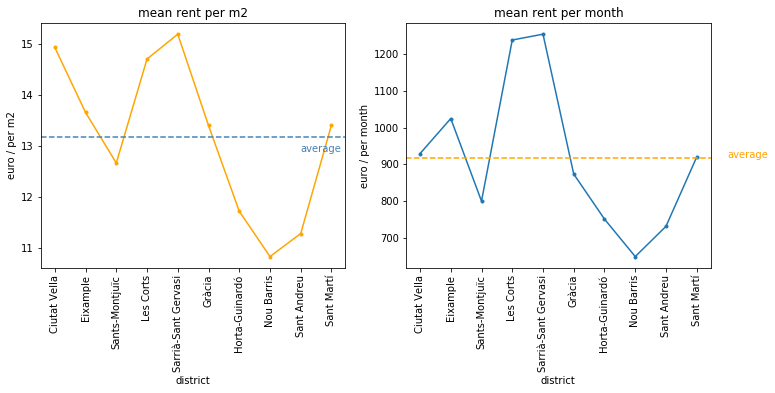

In [16]:
# 平均月租越高，每平方公尺月租越高？ 
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (12, 4.5)) 
ax1.set_xlabel('district')
ax1.set_ylabel('euro / per m2')
ax1.set_title('mean rent per m2')
ax1.plot(dist_barri.iloc[:,1], district_mean_price_p.iloc[:,0], marker='.', c='orange')
ax1.axhline(y=district_mean_price_p.iloc[:,0].mean(), linestyle='--', c='steelblue')
ax1.text('Sant Andreu', district_mean_price_p.iloc[:,0].mean()-0.3,'average', c='steelblue')

ax2.set_xlabel('district')
ax2.set_ylabel('euro / per month')
ax2.set_title('mean rent per month')
ax2.plot(dist_barri.iloc[:,1], district_mean_price_p.iloc[:,1], marker='.')
ax2.axhline(y=district_mean_price_p.iloc[:,1].mean(), linestyle='--', c='orange')
ax2.text('Sant Marti', district_mean_price_p.iloc[:,1].mean(),'average', c='orange')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.show()

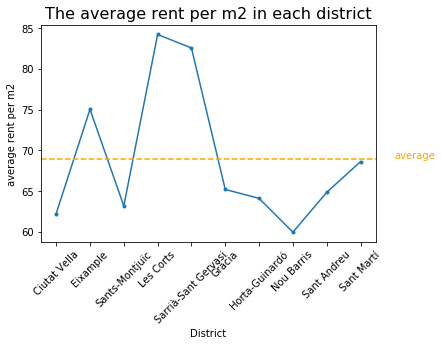

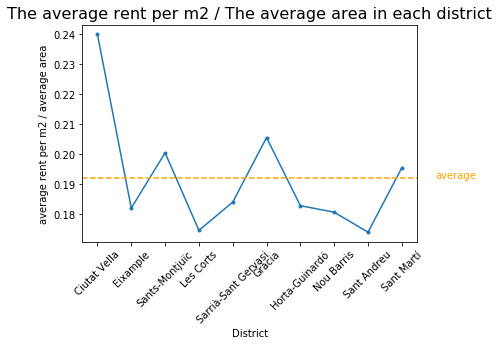

In [17]:
# the average area(m2) of the house in each district
average_m2 = district_mean_price_p.iloc[:,1] / district_mean_price_p.iloc[:,0] ; average_m2
plt.plot(dist_barri.iloc[:,1], average_m2, marker='.')
plt.xticks(rotation = 45)
plt.axhline(y=average_m2.mean(), linestyle='--', c='orange')
plt.text('Sant Marti', average_m2.mean(),'average', c='orange')
plt.xlabel('District')
plt.ylabel('average rent per m2')
plt.title('The average rent per m2 in each district', fontsize=16)
plt.show()
# 面積越大的房子，平均每平方公尺租金也會較高嗎？ 假設較富有的人較注重生活品質，會租在較好的區域，同時也會租更大間的房子
rentm2_area_ratio = district_mean_price_p.iloc[:,0] / average_m2
plt.plot(dist_barri.iloc[:,1], rentm2_area_ratio, marker='.') 
plt.xticks(rotation = 45)
plt.axhline(y=rentm2_area_ratio.mean(), linestyle='--', c='orange')
plt.text('Sant Marti', rentm2_area_ratio.mean(),'average', c='orange')
plt.xlabel('District')
plt.ylabel('average rent per m2 / average area')
plt.title('The average rent per m2 / The average area in each district', fontsize=16)
plt.show()

由上圖看出在 Ciutat Vella 的房屋雖然每個月的租金是在大約平均的價錢，但是其平均面積很小，因此其每平方公尺的租金相當的高。
這也是由於 Ciutat Vella（舊城區）在 Barcelona 的特性，這區位於巴塞隆納的中心，是巴塞隆納最老的一區，交通十分方便，也是觀光客最多的區域。

其餘區域每平方公尺平均租金跟每月平均租金則有相同的趨勢。

In [18]:
per_month_df = rent_2018[rent_2018.Lloguer_mitja=='per_month']
per_m2_df = rent_2018[rent_2018.Lloguer_mitja=='per_m2']; per_m2_df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
292,2018,1,1,Ciutat Vella,1,el Raval,per_m2,13.74
293,2018,1,1,Ciutat Vella,2,el Barri Gòtic,per_m2,13.30
294,2018,1,1,Ciutat Vella,3,la Barceloneta,per_m2,17.10
295,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",per_m2,14.68
296,2018,1,2,Eixample,5,el Fort Pienc,per_m2,12.63
...,...,...,...,...,...,...,...,...
579,2018,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,per_m2,16.84
580,2018,4,10,Sant Martí,70,el Besòs i el Maresme,per_m2,11.54
581,2018,4,10,Sant Martí,71,Provençals del Poblenou,per_m2,14.27
582,2018,4,10,Sant Martí,72,Sant Martí de Provençals,per_m2,11.77


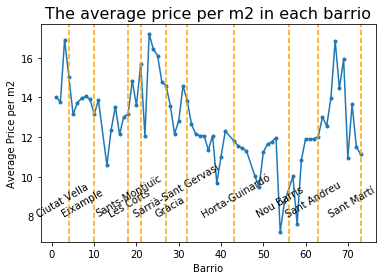

In [19]:
# Average rent per m2 of each barri

per_m2_g = per_m2_df.groupby(['Codi_Barri'])[['Preu']].mean()
per_m2_g = per_m2_g.reset_index()
plt.plot(per_m2_g.Codi_Barri, per_m2_g.Preu, marker='.')

for i in range(len(dist_barri)):
    plt.axvline(dist_barri.iloc[i,2],c='orange', linestyle='--')
    plt.text(dist_barri.iloc[i,2]-8, 8, dist_barri.iloc[i,1], rotation=30)
plt.xlabel('Barrio')
plt.ylabel('Average Price per m2')
plt.title('The average price per m2 in each barrio', fontsize=16)
plt.show()

#### 比較歷年(2015-2018) 各區及鄰里租金的變化


In [20]:
rent_2017 = pd.read_csv('data/2017_lloguer_preu_trim.csv')
rent_2016 = pd.read_csv('data/2016_lloguer_preu_trim.csv')
rent_2015 = pd.read_csv('data/2015_lloguer_preu_trim.csv')
rent = pd.concat([rent_2015, rent_2016, rent_2017, rent_2018])
rent.Lloguer_mitja.replace('Lloguer mitjà mensual (Euros/mes)', 'per_month', inplace=True)
rent.Lloguer_mitja.replace('Lloguer mitjà per superfície (Euros/m2 mes)', 'per_m2', inplace=True)
rent = rent.dropna(how='any')

# group by the way it counts the price & district code
district_price = rent.groupby(['Any', 'Lloguer_mitja', 'Codi_Districte'])[['Preu']].mean()
district_price = district_price.unstack(0)
district_price.reset_index(inplace=True) ; district_price

Lloguer_mitja Codi_Districte         Preu                            \
Any                                      2015         2016         2017   
0          per_m2              1    12.840000    14.388125    15.908750   
1          per_m2              2    11.109583    12.307083    13.342083   
2          per_m2              3    10.202333    11.238621    12.570000   
3          per_m2              4    12.401667    13.509167    14.591667   
4          per_m2              5    13.027083    14.777083    15.947083   
5          per_m2              6    11.234500    12.372000    13.507000   
6          per_m2              7     9.773171    10.670250    11.831750   
7          per_m2              8     8.373571     9.103111     9.840889   
8          per_m2              9     8.835556     9.481154    10.765000   
9          per_m2             10    10.744750    11.843750    13.026000   
10      per_month              1   682.972500   752.025000   846.157500   
11      per_month              2   823.833333   903.200000   977.381667   
12      per_month              3   611.302000   662.417241   760.347500   
13      per_month              4  1104.312500  1142.603333  1235.718333   
14      per_month              5  1083.350833  1185.864167  1281.412500   
15      per_month              6   690.794000   756.196000   834.324000   
16      per_month              7   595.011463   649.610000   718.368250   
17      per_month              8   501.618571   517.648261   583.030000   
18      per_month              9   551.302222   586.164615   671.357500   
19      per_month             10   735.776750   800.330750   869.569500   

                  
Any         2018  
0      14.932500  
1      13.656667  
2      12.663214  
3      14.704167  
4      15.192083  
5      13.400000  
6      11.717250  
7      10.827561  
8      11.279200  
9      13.408500  
10    929.106250  
11   1024.575000  
12    799.807143  
13   1238.325833  
14   1254.222500  
15    873.446000  
16    750.917750  
17    648.947561  
18    731.195200  
19    919.760000

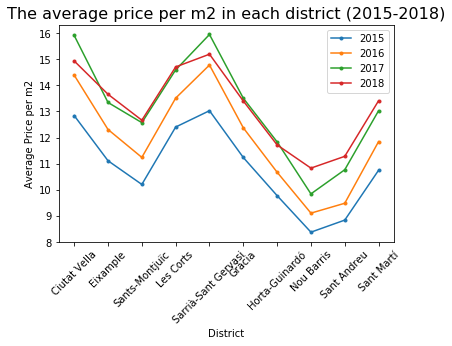

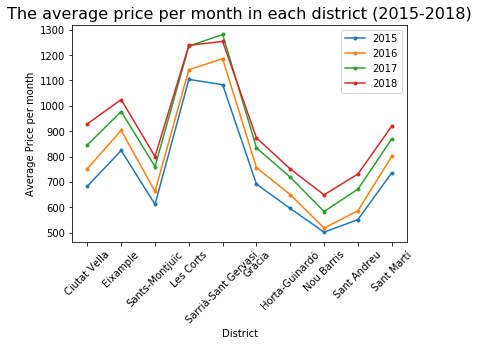

In [21]:
# create new columns which are the increase percentage of each year 
district_price['increase_p_16']= ((district_price['Preu'][2016] - district_price['Preu'][2015])/district_price['Preu'][2015])*100
district_price['increase_p_17']= ((district_price['Preu'][2017] - district_price['Preu'][2016])/district_price['Preu'][2016])*100
district_price['increase_p_18']= ((district_price['Preu'][2018] - district_price['Preu'][2017])/district_price['Preu'][2017])*100

# create two df which contain the price per m2 & price per month repectively
distr_m2 = district_price.iloc[:10,:]
distr_mon = district_price.iloc[10:,:]

# draw the plot of each df
year = (2015,2016,2017,2018)
for y in year:
    plt.plot(dist_barri.iloc[:,1], distr_m2['Preu'][y], marker='.')
plt.legend(year)
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('Average Price per m2')
plt.title('The average price per m2 in each district (2015-2018)', fontsize=16)
plt.show()

for y in year:
    plt.plot(dist_barri.iloc[:,1], distr_mon['Preu'][y], marker='.')
plt.legend(year)
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('Average Price per month')
plt.title('The average price per month in each district (2015-2018)', fontsize=16)
plt.show()

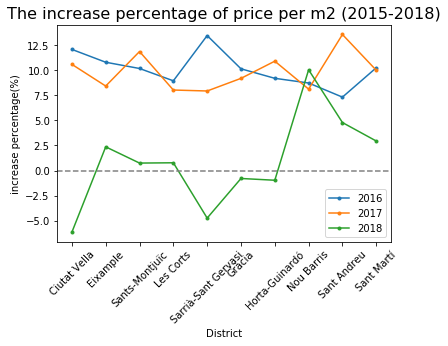

The average increase percentage : 
 from 2015 to 2016: 10.09 
 from 2016 to 2017: 9.84 
 from 2017 to 2018: 0.90


In [39]:
plt.plot(dist_barri.iloc[:,1], distr_m2['increase_p_16'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_m2['increase_p_17'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_m2['increase_p_18'], marker='.')
plt.legend((2016, 2017, 2018))
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--',c='gray')
plt.xlabel('District')
plt.ylabel('increase percentage(%)')
plt.title('The increase percentage of price per m2 (2015-2018)', fontsize=16)
plt.show()

print('The average increase percentage : \n from 2015 to 2016: {:.2f}'.format(distr_m2['increase_p_16'].mean()),
      '\n from 2016 to 2017: {:.2f}'.format(distr_m2['increase_p_17'].mean()), 
      '\n from 2017 to 2018: {:.2f}'.format(distr_m2['increase_p_18'].mean()))

由上圖可看出2017年平均租金成長率較2016年有些許的趨緩，但各個區域不一，差別並不大。
2018年的平均租金成長率則大幅下降，其中十個區域中甚至有四個區域成長率為負，平均租金下降，其餘除了Nou Barris之外成長率也都大幅下降。
Nou Barris 因為其本身平均租金就是十區中最低，

[新聞](https://www.thelocal.es/20181218/what-you-need-to-know-about-spains-2018-rent-law-changes)
歷年各區的租金都是

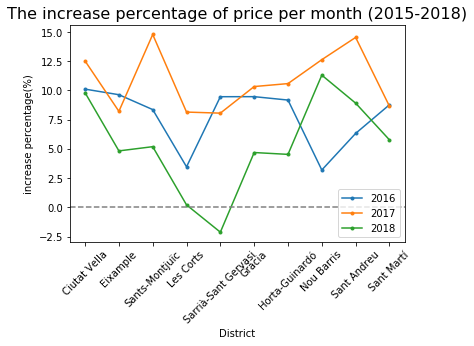

The average increase percentage : 
 from 2015 to 2016: 7.80 
 from 2016 to 2017: 10.85 
 from 2017 to 2018: 5.31


In [42]:
plt.plot(dist_barri.iloc[:,1], distr_mon['increase_p_16'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_mon['increase_p_17'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_mon['increase_p_18'], marker='.')
plt.legend((2016, 2017, 2018), loc='lower right')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--',c='gray')
plt.xlabel('District')
plt.ylabel('increase percentage(%)')
plt.title('The increase percentage of price per month (2015-2018)', fontsize=16)
plt.show()

print('The average increase percentage : \n from 2015 to 2016: {:.2f}'.format(distr_mon['increase_p_16'].mean()),
      '\n from 2016 to 2017: {:.2f}'.format(distr_mon['increase_p_17'].mean()), 
      '\n from 2017 to 2018: {:.2f}'.format(distr_mon['increase_p_18'].mean()))